In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("BTC-USD-5Tahun2019.csv")

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-16,0.04951,0.04951,0.04951,0.04951,0.04951,0
1,2010-07-17,0.04951,0.08585,0.05941,0.08584,0.08584,5
2,2010-07-18,0.08584,0.09307,0.07723,0.08080,0.08080,49
3,2010-07-19,0.08080,0.08181,0.07426,0.07474,0.07474,20
4,2010-07-20,0.07474,0.07921,0.06634,0.07921,0.07921,42


alpha = 4.553125645994669
beta = 0.9982227530899065


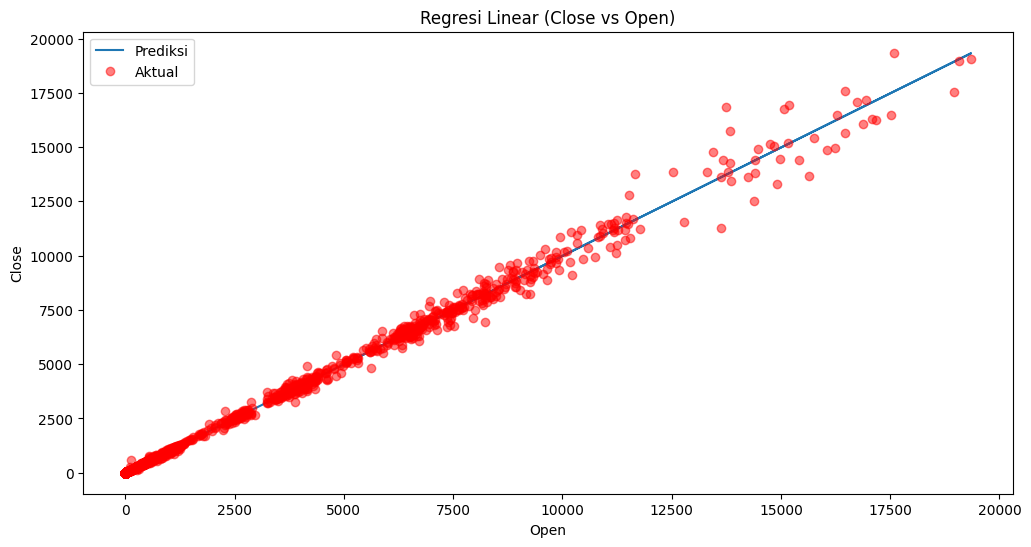

In [4]:
# variable x dan y
x = df["Open"]
y = df["Close"]

# hitung mean
xmean = np.mean(x)
ymean = np.mean(y)

# hitung covariance dan variance 
xycov = (x - xmean) * (y - ymean)
xvar = (x - xmean)**2

# hitung beta & alpha
beta = xycov.sum() / xvar.sum()
alpha = ymean - (beta * xmean)

print(f"alpha = {alpha}")
print(f"beta = {beta}")

# fungsi prediksi
ypred = alpha + beta * x

# plot
plt.figure(figsize=(12,6))
plt.plot(x, ypred, label="Prediksi")
plt.plot(x, y, "ro", label="Aktual", alpha=0.5)
plt.title("Regresi Linear (Close vs Open)")
plt.xlabel("Open")
plt.ylabel("Close")
plt.legend()

plt.show()

In [7]:
# pilih variabel
x1 = df["Open"]
x2 = df["High"]
y = df["Close"]

# buat dataframe
data = pd.DataFrame({"x1": x1, "x2": x2, "y": y})

# analisis regresi
X = sm.add_constant(data[["x1","x2"]])
model = sm.OLS(data["y"], X).fit()
koefisien = model.params
print(koefisien)

# scatter plot 3D
scatter_plot = go.Scatter3d(
    x=data["x1"], y=data["x2"], z=data["y"],
    mode="markers", marker=dict(size=4, color="blue", opacity=0.6),
    name="Data BTC"
)

# grid permukaan regresi
x1_grid, x2_grid = np.meshgrid(
    np.linspace(data["x1"].min(), data["x1"].max(), 20),
    np.linspace(data["x2"].min(), data["x2"].max(), 20)
)
y_pred = koefisien.iloc[0] + koefisien.iloc[1] * x1_grid + koefisien.iloc[2] * x2_grid

regresion_surface = go.Surface(
    x=x1_grid, y=x2_grid, z=y_pred,
    colorscale="Reds", opacity=0.5, name="Garis Regresi"
)

# buat layout
layout = go.Layout(
    title="Scatter 3D Regresi BTC (Close vs Open & High)",
    scene=dict(xaxis_title="Open", yaxis_title="High", zaxis_title="Close"),
    showlegend=True
)

# buat figure
fig = go.Figure(data=[scatter_plot, regresion_surface], layout=layout)

# menampilkan show
fig.show()

const    11.329977
x1       -0.108305
x2        1.067747
dtype: float64
